# Paper Review

Shauna Heron (Laurentian University)

# **Introduction and Motivation**

This review analyzes the study by Garriga et al. (2023), published in *Cell Medical*, titled *“Combining Clinical Notes with Structured Electronic Health Records Enhances the Prediction of Mental Health Crises.”*

The research investigates the utility of combining unstructured clinical notes with structured data from electronic mental health records (EMHR) to improve the prediction of mental health crises. The relevance of @garriga2023 study is underscored by the alarming rise in mental health-related hospitalizations coinciding with significant resource and workforce challenges. Even in Ontario, recent data highlights that hospitalizations for mental health conditions, particularly among youth in Ontario, have surged since the COVID-19 pandemic and those requiring hospitalization (e.g., emotional breakdowns, substance overdoses and suicide attempts) have increased by 90% (CIHI 2022). What’s worse, many of these crises might have been prevented with early intervention. However a lack of predictive tools has made it difficult for healthcare systems to anticipate and address these crises before they peak.

As @garriga2023 point out, leveraging Electronic Health Records (EHRs) to bolster clinical decision-making is not new, as clinicians and researchers have long utilized structured data like diagnosis codes, lab results, and medication records, to inform predictive models and treatment strategies. However, due to computational restraints and challenges modelling unstructured data like clinical notes and other free-form text has been left largely untapped. Considering this form of data constitutes a substantial portion of EHRs in terms of volume and contains critical qualitative information like clinician observations, patient-reported symptoms, and contextual details surrounding patient interactions–all qualities that structured data lacks– @garriga2023 argue that by incorporating this textual data into predictive modelling we might further enhance their predictive ability.

## Problem Statement

The primary objective of the study was to predict mental health crises utilizing both structured and unstructured mental health data.

When a patient is admitted to acute care with a mental crisis it might be their first visit or the most recent in a long history of crisis events. At each event, a mix of information is collected including structured data comprised of discrete variables (i.e., gender, diagnoses, and school district), continuous variables (i.e., standardized assessment scores) and administrative data (i.e., number of visits, hours of service) and time based data like intake, discharge and assessment dates.

The main challenge posed by these data was the clinical reality that the information contained in any one EHR varied significantly from patient to patient. Moreover, clincian-level idosyncricies like personal style, work habits and clinical modality meant that the quality, availability and volume of clinical notes in EHRs was highly inconsistent. Moreover, the severity and frequency of a patients mental health crises was related to the volume of notes within the EHR, meaning that those with more severe or recurrent episodes typically had a greater volume of clinical notes. As such, it was important that to establish the minimum quantity of unstructured data that would contribute to the accurate prediction of mental health crises and still remain effective across a spectrum of patient complexity, regardless of the volume of clinical notes.

How would they contend with this probleM?

## **Solution**

The study extended @garriga2023 previous work that had analyzed 60,000 de-identified patient records collected over eight years to predict mental health crisis within the next 28 days following a weekly algorithm prediction. Their main objectives were to i) compare the predictive power of unstructured data alone with structured data; ii) improve performance by comparing methods for combining structured and unstructured data; and iii) investigate the minimum amount of unstructured data necessary to improve model accuracy.

## **Experimental Setup**

To this end researchers utilized a dataset that included more than two million crisis events that had occured between September 2012 and July 2020, which is an average of 336 crisis events per week. 99% of patients had at least one clinical note and 81% had two notes or more. On average unstructured data yielded one note for each patient approximately every 10 weeks with the average not containing on average around 110 words.

450 features were computed from the structured data along three broad categories: i) static features; ii) most recent interaction variables and iii) elapsed time variables that quantified the amount of time since a specific event (e.g. last assessment or crisis episode). From the unstructured data (i.e. clinical notes written by mental health practitioners), semantic features were calculated across 768 dimensions using a BERT model. See Star methods.

Data was not split randomly instead training, validation and testing segments were time-split according to temporal slices which mirrored the model’s potential application in everyday practice. This meant that training data were comprised of earlier data, validation data from the period following and test data included a years worth of most recent data. Interestingly the researchers omited data between January 2020 and July 2020 because of the potential impact of COVID that impacted hospita lroutines and therefore EHRs. The best hyperperameters of each model were selected by optimizing the area under the precision recall curve (AUPRC) and then used to train the model in the training and validation sets.

Shap values were used to measure the contribution of each feature in the model which is a technique taken from game theory that is used for local interpretability of ML models.

### Metrics

With these features, four models were trained to predict the risk of relapse within the next 28 days as a binary classification problem (relapse versus no relapse) based on structured data only (Struct XGB and Struct DNN), unstructured data only (Unstruct DNN) and both data types (Hybrid DNN). Finally an ensemble model was created using predictions from a version of the Hybrid DNN when there were unstructured data available and the predictions from the Struct DNN model otherwise (Ensemble DNN) see @fig-experimentaldesign. Two baselines were identified: a 5-factor logistic regression model (LogReg5) informed by important variables suggested by the literature; and a heuristic model that ranks patients based on total number of crisis experienced during the past year (last 53 weeks).

![Includes all five trained models and the types of data used as input. Struct XGB is an XGBoost model and the rest feed forward neural networks with ensemble DNN combining the results of a neural network trained on structured data only and a neural network trained on both structured and unstructured data.](attachment:images/paste-1.png){#fig-experimentaldesign }

Due to the fact that relapses occur infrequently (prevalence of 1.3%), the models were tuned to maximize the area under the precision recall curve (AUPRC) on the validation set which they point out is the preferred metric for evaluationg the performance of binary classification tasks with an unbalanced distribution.

## Performance Results

The best model performance using only structured data was an XGBoost model which is a tree-based classifier that implements gradient boosting. For the model with only unstructured data and the combined structured and unstructured data, the best model performance was a feedforward deep neural network (DNN).

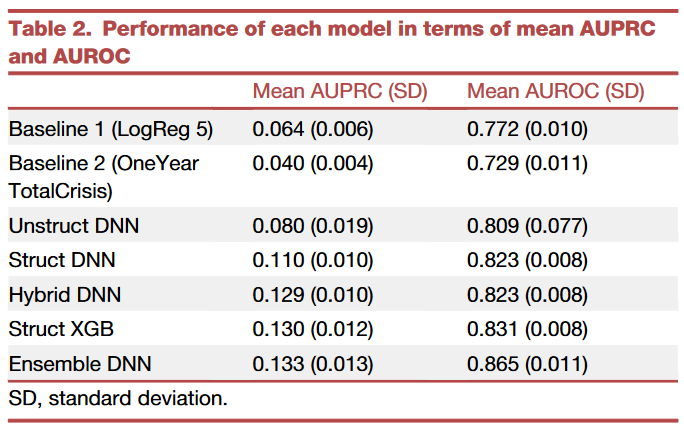{ width="350"}

**Provide an in-depth analysis of the performance results, and feel free to include diagrams or data directly from the paper.**

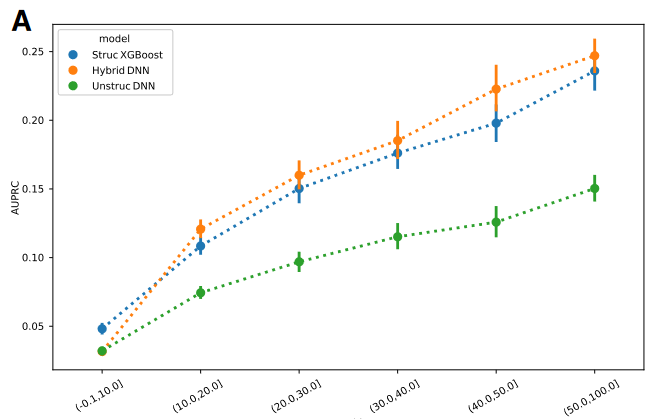{ width="513"}

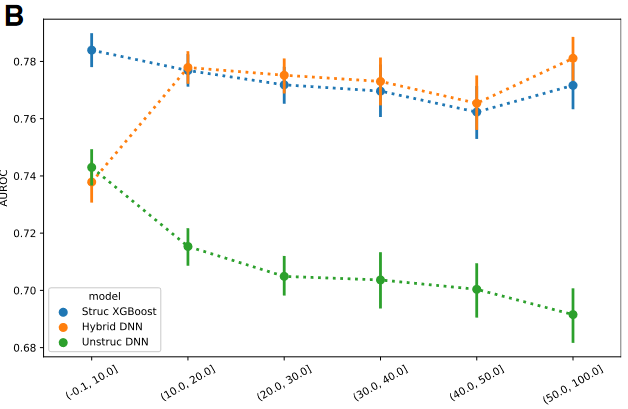{ width="513"}<!-- -->

-   Contrast the presented solution with other existing methods, focusing on its advantages and disadvantages. Reflect on what we’ve studied in class, making connections where relevant.

## **Conclusions and Further Work:**

-   **Summarize the paper’s key takeaways and suggest potential areas for future research or exploration.**
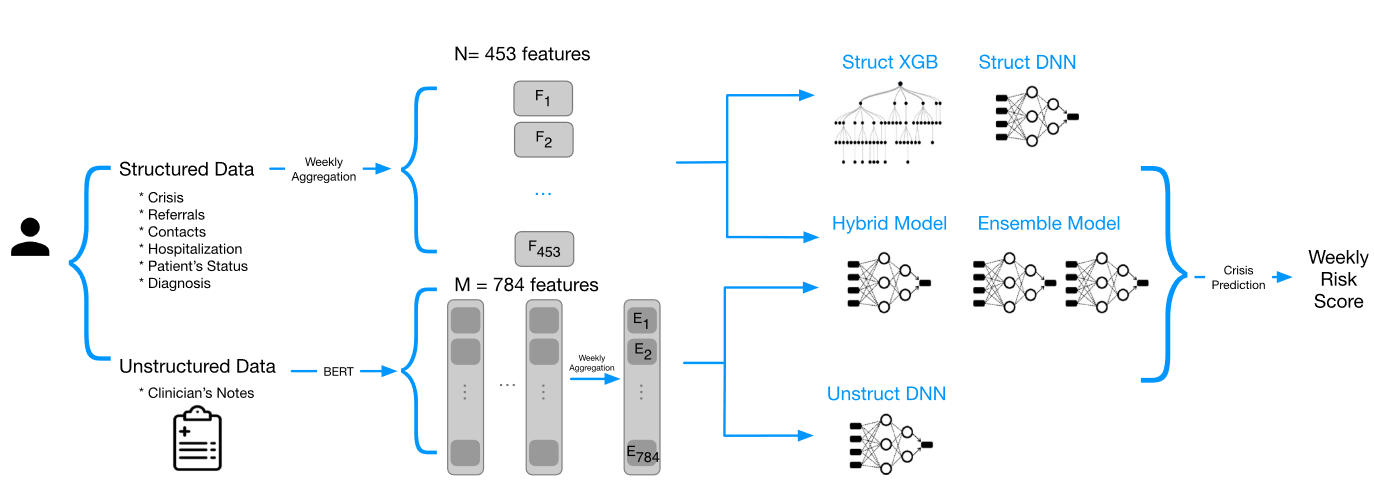